Use the Machine Learning algorithms: Logistic Regression,
KNN, K-means, Decision Tree, and Random Forest, with
parameters optimization to classify Glioblastomas using the
database Data_Glioblastoma5Patients_SC.csv and evaluate
the performance.

In [ ]:
import os
import pandas as pd

Reading the data

In [2]:
Data = pd.read_csv("./Data_Glioblastoma5Patients_SC.csv")
Data.shape

(430, 5949)

It seems we have 430 rows and 5949 columns in the dataset.

In [3]:
Data.head(10)

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
0,-3.80147,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,...,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696,1
1,-3.80147,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696,1
2,-3.80147,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,...,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696,1
3,-3.80147,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,...,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696,1
4,-3.80147,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,...,-1.821098,4.328808,-1.538324,7.021985,-1.558581,4.590946,-0.128456,-2.509017,-2.149696,1
5,-1.98770,-3.889900,4.691156,-4.006471,-3.449348,4.309767,4.002960,5.123457,0.341512,-2.570976,...,4.176419,-2.370500,-1.538324,-1.550699,-1.558581,-3.068620,-3.421540,-2.509017,-2.149696,1
6,-3.80147,-3.889900,2.656469,2.207608,-6.041792,4.235937,0.716257,-1.164354,2.630053,-2.570976,...,-1.821098,0.071490,-1.538324,5.651368,-1.558581,3.617386,1.384471,-2.509017,-2.149696,1
7,-3.80147,-3.889900,-1.914759,2.417820,3.162904,-3.699171,-2.473517,-4.354127,1.970206,-2.570976,...,-1.821098,3.615788,-1.538324,-1.550699,-1.558581,1.829214,5.237998,-2.509017,6.779879,1
8,-3.80147,-3.889900,0.483560,-5.820241,-6.041792,-3.699171,-2.473517,4.889074,-3.847544,-2.570976,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,-0.775154,1.953289,-2.149696,1
9,-3.80147,4.316243,1.828663,2.140173,-6.041792,3.721094,3.479903,-4.354127,-4.860593,-2.570976,...,-1.821098,-0.860025,0.841462,-1.550699,-1.558581,5.157919,4.710859,5.078266,4.977025,1


'Classes' column in the dataset contains the labels. So, I am going to check how many unique labels are there.

In [4]:
Data['Classes'].unique()

array([1, 2, 3, 4, 5])

Now, I am going to define the features and labels from the dataset.

In [5]:
X = Data.drop(columns = "Classes")
X.head(5)

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSCAN30,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3
0,-3.80147,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,...,6.262256,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696
1,-3.80147,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,...,2.912340,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696
2,-3.80147,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,...,-2.593571,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696
3,-3.80147,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,...,4.453041,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696
4,-3.80147,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,...,-2.593571,-1.821098,4.328808,-1.538324,7.021985,-1.558581,4.590946,-0.128456,-2.509017,-2.149696


In [6]:
y = Data["Classes"]
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

Now, I will split the dataset into training and test dataset where I will be using 80% of the dataset for training and remianing 20% for testing.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(344, 5948) (86, 5948) (344,) (86,)


Next, I want to use different machine learning algorithms namely: Logistic Regression, KNN, Decision Tree, and Random Forest to fit the data.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, model_selection
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

results = []
names = []


for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))


LR: 0.982353 (0.019510)
KNN: 0.634034 (0.070064)
DT: 0.866134 (0.040134)
RF: 0.965042 (0.028550)


It seems like Linear Regression is the best fit for our data with an accuracy of 0.98. We can also check this by plotting

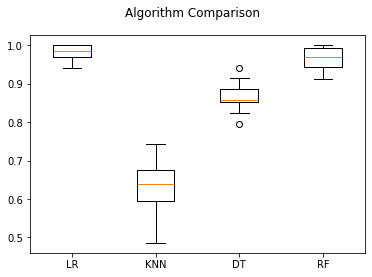

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Plot confirms that logistic regression is the best model. Now, I want to make sure if LR best fits the test dataset as well.

In [11]:
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
LR.fit(X_train, y_train)

# Now, I want to make predictions on the validation data set and print out accuracy score and confusion matrix
predictions = LR.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))


0.9767441860465116
[[23  0  0  0  1]
 [ 0 23  0  0  0]
 [ 0  0 12  0  0]
 [ 1  0  0 13  0]
 [ 0  0  0  0 13]]


/Users/ka422/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The accuracy score for the test dataset using the LR is ~ 0.98, which is similar to that of training datset, suggesting the best model. This also get validated by the confusuin matrix, where we can see there are only two instances of misclassification.

Random Forest had an accuracy of 0.95 for training dataset. Now, we can check the accuracy of this model on the test dataset.

In [12]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9883720930232558
[[24  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 12  0  0]
 [ 1  0  0 13  0]
 [ 0  0  0  0 13]]


The accuracy of RF for test set is 0.95, which is similar to the training dataset but lowe than that of LR. We can check if the accuracy of this model can be increased by iterating over classifier.

In [13]:
clf = RandomForestClassifier(n_estimators=20, random_state=0)

clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))

import numpy as np
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc
print(accuracy(conf_te),)
print (conf_te)

0.9534883720930233
[[23  1  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 13  1]
 [ 1  0  0  1 11]]


As we can see the performance of the model doesn't increase by iterating over the classifier.

Next, we can check how the Decision Tree performs on our test dataset.

In [14]:
DT=tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.872093023255814
[[23  0  0  0  1]
 [ 1 21  1  0  0]
 [ 0  1 11  0  0]
 [ 0  1  2 11  0]
 [ 0  1  1  2  9]]


Decision tree performs similar for both training and test datasets. Now, we can try the KNN classifier.

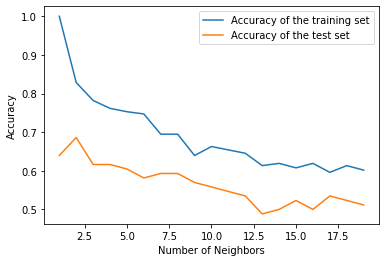

In [15]:
#KNN Classifier 
training_accuracy = []
test_accuracy = []

#Here, I am going to try KNN for diffrent k nearest neighbor from 1 to 20
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.show()

By looking at the plot, it doesn't look like the accuracy of training and test set match each other but they get closer to each other whennumber of neighbors are 8 and 17. But those test accuracy are lower than what we observed with LR and RF.

Next, we can look at KMeans algorithm.

In [16]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3, random_state=1)
clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print(accuracy(conf_te),)
print(conf_te)

0.23255813953488372
[[ 0  0  0  0  0  0]
 [21  1  2  0  0  0]
 [ 0  4 19  0  0  0]
 [ 1  0 11  0  0  0]
 [ 3  2  9  0  0  0]
 [ 0 10  3  0  0  0]]


KMeans seems to do worse with our dataset.

So, Logistic Regression seems to be the model that best fits our dataset.